In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
source_file = 'Bean there done that data.xlsx'
bean_data = pd.read_excel(source_file, sheet_name='Inventory (finished product)')
bean_data.head()

,Product,Month,Stock level,Unit,Scrapped,Reasoncode,Unit price,Stock value
0,Dark roast,January,18660,Kg,0,NaN,22.98,428806.80
1,Dark roast,February,17290,Kg,0,NaN,22.98,397324.20
2,Dark roast,March,27231,Kg,0,NaN,22.98,625768.38
3,Dark roast,April,32511,Kg,0,NaN,22.98,747102.78
4,Dark roast,May,36683,Kg,0,NaN,22.98,842975.34


<Figure size 1000x600 with 0 Axes>

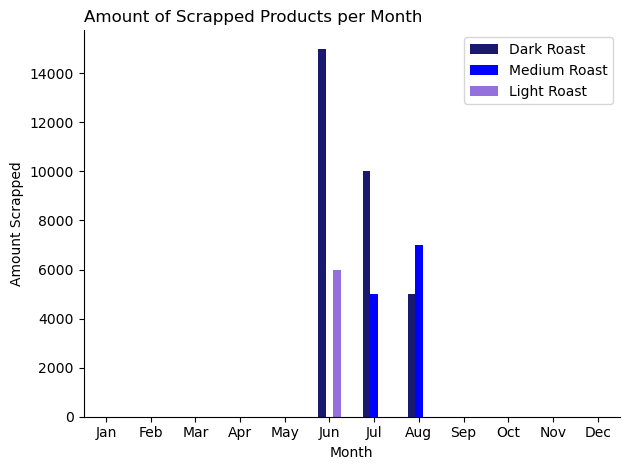

In [6]:
# Assuming bean_data is already defined and contains the necessary columns.
# Filtering the data for each product type
dark_roast_data = bean_data[bean_data['Product'] == 'Dark roast']
medium_roast_data = bean_data[bean_data['Product'] == 'Medium roast']
light_roast_data = bean_data[bean_data['Product'] == 'Light roast']

# Define the correct chronological order for the months with shortened names
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def plot_scrapped_product(data1, data2, data3, product_name1, product_name2, product_name3):
    # Group and sum the scrapped values for each dataset
    scrapped_per_month1 = data1.groupby('Month')['Scrapped'].sum().abs()
    scrapped_per_month2 = data2.groupby('Month')['Scrapped'].sum().abs()
    scrapped_per_month3 = data3.groupby('Month')['Scrapped'].sum().abs()

    # Map full month names to shortened names
    month_map = {
        'January': 'Jan', 'February': 'Feb', 'March': 'Mar', 'April': 'Apr',
        'May': 'May', 'June': 'Jun', 'July': 'Jul', 'August': 'Aug',
        'September': 'Sep', 'October': 'Oct', 'November': 'Nov', 'December': 'Dec'
    }

    # Apply mapping and ensure chronological order
    scrapped_per_month1.index = scrapped_per_month1.index.map(month_map)
    scrapped_per_month2.index = scrapped_per_month2.index.map(month_map)
    scrapped_per_month3.index = scrapped_per_month3.index.map(month_map)

    scrapped_per_month1.index = pd.Categorical(scrapped_per_month1.index, categories=month_order, ordered=True)
    scrapped_per_month2.index = pd.Categorical(scrapped_per_month2.index, categories=month_order, ordered=True)
    scrapped_per_month3.index = pd.Categorical(scrapped_per_month3.index, categories=month_order, ordered=True)

    # Combine all three datasets into one DataFrame for plotting
    combined_data = pd.DataFrame({
        'Product 1': scrapped_per_month1,
        'Product 2': scrapped_per_month2,
        'Product 3': scrapped_per_month3
    }).fillna(0)  # Fill NaN values with 0

    # Plotting
    plt.figure(figsize=(10, 6))
    ax = combined_data.sort_index().plot(kind='bar', color=['midnightblue', 'blue', 'mediumpurple'])  # Different colors for each product
    plt.xlabel('Month')
    plt.ylabel('Amount Scrapped')
    
    # Move title to the left and remove the top and right spines
    ax.set_title('Amount of Scrapped Products per Month', loc='left')
    ax.spines['top'].set_visible(False)  # Remove top spine
    ax.spines['right'].set_visible(False)  # Remove right spine

    plt.xticks(rotation=0)  # Ensure month names are displayed horizontally
    plt.legend([product_name1, product_name2, product_name3])  # Add legend with product names
    plt.tight_layout()  # Adjust layout for better fit
    plt.show()

# Plot for Dark Roast
plot_scrapped_product(dark_roast_data, medium_roast_data, light_roast_data, 'Dark Roast', 'Medium Roast', 'Light Roast')
